# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Hyperparameter Tuning](#hyperparameter-tuning)
4. [Implementation](#implementation)
5. [Evaluation Metrics](#evaluation-metrics)
6. [Comparative Analysis](#comparative-analysis)


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
# Import models you're considering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM


## Model Selection

[Discuss the type(s) of models you consider for this task, and justify the selection.]



## Feature Engineering

[Describe any additional feature engineering you've performed beyond what was done for the baseline model.]


In [4]:
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('/workspaces/Machine_learning_tensorflow/1_DatasetCharacteristics/Data_final.csv')
#df = pd.read_csv('/workspaces/Machine_learning_tensorflow/3_Model/Data_test.csv')

# Perform any feature engineering steps
# Example: df['new_feature'] = df['feature1'] + df['feature2']

# Feature and target variable selection
#'Latitude','Longitude','Climate Change Impact','Lehm' ,'Ptolomaer',
          #'Erste Zwischenzeit' ,'Antike', 'Spätzeit', 'Dritte Zwischenzeit', 'Neues Reich','Zweite Zwischenzeit','Römisch','Mittleres Reich',
          #'Demotisch','Griechisch','Koptisch','Hieroglyphen','Keilschrift','Hieratisch','Granit','Sandstein'
categorical_columns = ['Ptolomaer',
        'Erste Zwischenzeit' ,'Antike', 'Spätzeit', 'Dritte Zwischenzeit', 'Neues Reich','Zweite Zwischenzeit','Römisch','Mittleres Reich',
        'Bronze','Demotisch','Griechisch','Koptisch','Hieroglyphen','Keilschrift','Hieratisch','Kalkstein','Gips','Gold','Holz','Sandstein','Lehm','Granit','Ziegel']
df_encoded = pd.get_dummies(df, columns = categorical_columns)
X = df[['Latitude',
        'Longitude',
        'Human Activity Index',
        'Climate Change Impact',
        'Sonar Radar Detection',
        'Looting Risk (%)', 
        'Ptolomaer',
        'Erste Zwischenzeit' ,
        'Antike', 'Spätzeit', 
        'Dritte Zwischenzeit', 
        'Neues Reich',
        'Zweite Zwischenzeit',
        'Römisch',
        'Mittleres Reich',
       'Bronze',
       'Demotisch',
       'Griechisch',
       'Koptisch',
       'Hieroglyphen',
       'Keilschrift',
       'Hieratisch',
       'Kalkstein',
       'Gips',
       'Gold',
       'Holz',
       'Sandstein',
       'Lehm',
       'Granit',
       'Ziegel'
       ]]
y = df['AI Prediction Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Hyperparameter Tuning

[Discuss any hyperparameter tuning methods you've applied, such as Grid Search or Random Search, and the rationale behind them.]


In [ ]:
# Implement hyperparameter tuning
# Example using GridSearchCV with a DecisionTreeClassifier
# param_grid = {'max_depth': [2, 4, 6, 8]}
# grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
#linear_model.SGDOneClassSVM(random_state=42) (baseline model)
#svm.OneClassSVM, the ensemble.IsolationForest, the neighbors.LocalOutlierFactor and covariance.EllipticEnvelope.
from sklearn.svm import OneClassSVM
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
 


#model.summary()





[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2025-07-07 17:08:38.048852: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-07 17:08:38.070178: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 17:08:38.380174: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 17:08:38.494823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751908118.799977    2341 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751908118.91

If I understand correctly one class models do not have layers one could tune.

## Implementation

[Implement the final model(s) you've selected based on the above steps.]


In [ ]:
# Implement the final model(s)
# Example: model = YourChosenModel(best_hyperparameters)
# model.fit(X_train, y_train)
#y_train=df['AI Prediction Score'] = pd.Series(["1" for x in range(len(df.index))])
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

clf1 = OneClassSVM(tol=0.00001, nu=0.1,gamma='auto').fit(X_train)
clf2 = IsolationForest(n_estimators=100, contamination=0.0001,random_state=0).fit(X_train)
clf3 = LocalOutlierFactor(n_neighbors=2).fit(X_train)
clf4 = EllipticEnvelope(contamination=0.0001, random_state=0).fit(X_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:749: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-129.601356879186312 > -130.339161552705207). You may want to try with a higher value of support_fraction (current value: 0.540).
  warnings.warn(


I chose 4 models to compare accuracy. All are One Class  but use different mathematical approches.

## Evaluation Metrics

[Clearly specify which metrics you'll use to evaluate the model performance, and why you've chosen these metrics.]


In [14]:
# Evaluate the model using your chosen metrics
# Example for classification
#y_pred = clf.predict(X_test)

X_test= pd.read_csv('/workspaces/Machine_learning_tensorflow/3_Model/Data_test.csv')
X_test=X_test.drop(['AI Prediction Score'], axis=1)

y_pred1=clf1.fit_predict(X_test)
y_pred2=clf2.fit_predict(X_test) 
y_pred3=clf3.fit_predict(X_test)
y_pred4=clf4.fit_predict(X_test)
print(y_pred1)
print(y_pred2)
print(y_pred3)
print(y_pred4)

[ 1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
 -1  1]
[ 1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]
[ 1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1
  1  1]
[ 1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:749: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


## Comparative Analysis

[Compare the performance of your model(s) against the baseline model. Discuss any improvements or setbacks and the reasons behind them.]


In [8]:
# Comparative Analysis code (if applicable)
# Example: comparing accuracy of the baseline model and the new model
# print(f"Baseline Model Accuracy: {baseline_accuracy}, New Model Accuracy: {new_model_accuracy}")


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(X_train.shape[1], )),
  BatchNormalization(),
  Dense(125, activation='relu'),
  Dropout(.3),
  Dense(110, activation='relu'),
  Dropout(.3),
  Dense(50, activation='relu'),
  Dense(1)
])

model.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-07-07 17:08:43.699108: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 125)            │         3,875 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 110)            │        13,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 110)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,456 (91.62 KB)

 Trainable params: 23,396 (91.39 KB)

 Non-trainable params: 60 (240.00 B)

In [10]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))


history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5711.2695 - val_loss: 3643.7297
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5371.7832 - val_loss: 1442.3835
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4338.7427 - val_loss: 331.3208
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2161.2393 - val_loss: 6794.8213
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 479.0449 - val_loss: 11964.9316
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 431.1031 - val_loss: 3348.8457
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 340.8613 - val_loss: 1526.3091
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 400.7614 - val_loss: 995.4747
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 360.0387 - val_loss: 527.7913
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 302.8209 - val_loss: 404.8931
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 327.0453 - val_loss: 376.8218
Epoch 12/20
13/13 

In [11]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(X_train)
validation_predictions = model.predict(X_test)
#test_predictions = model.predict(test_features)
print(f"MAPE on the Training Data: {mape(y_train, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(y_test, validation_predictions):.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MAPE on the Training Data: 19.59%
MAPE on the Validation Data: 17.67%


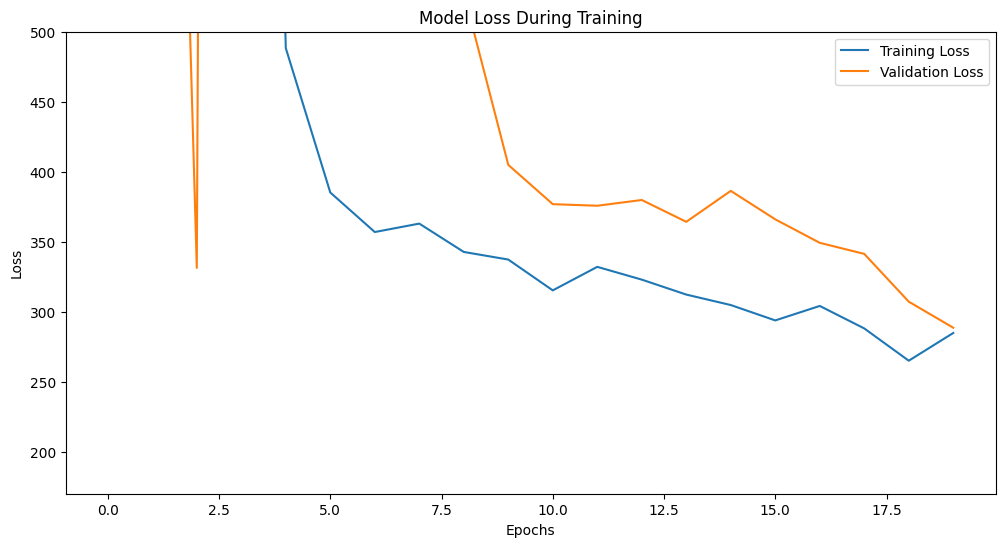

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.ylim(top=500)
plt.ylim(bottom=170)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

I chose a simple model due to time constrains and played around with the different parameters, this is the best I got. There still seems to be an issue with overfitting. 